In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import random

import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#ML Models/Regression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score, classification_report, confusion_matrix, roc_auc_score

# Track training timing/completion
from tqdm import tqdm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df1 = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
# Dropping ambiguous columns not properly defined in dataset description
df1 = df1.drop(columns=['oldpeak', 'slp', 'thall'])
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


In [3]:
#check for missing values
missing_values_1 = df1.isnull().sum()
missing_values_1

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [4]:
#remove duplicate values
df1 = df1.drop_duplicates()
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


In [5]:
df1 = df1.drop(columns=['trtbps', 'chol','fbs', 'restecg'])
df1

,age,sex,cp,thalachh,exng,caa,output
0,63,1,3,150,0,0,1
1,37,1,2,187,0,0,1
2,41,0,1,172,0,0,1
3,56,1,1,178,0,0,1
4,57,0,0,163,1,0,1
...,...,...,...,...,...,...,...
298,57,0,0,123,1,0,0
299,45,1,3,132,0,0,0
300,68,1,0,141,0,2,0
301,57,1,0,115,1,1,0


Here, we drop some columns based on previously done feature analysis to reduce number of parameters required from user. The analysis was conducted from a combination of looking at correlation heatmaps and the feature_importance attributes of the RF and GB classifiers, and manually dropping columns and seeing the effect on AUC.

/tmp/ipykernel_18/3453824556.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.02, 'Pair Plot of Features with Class Labels')

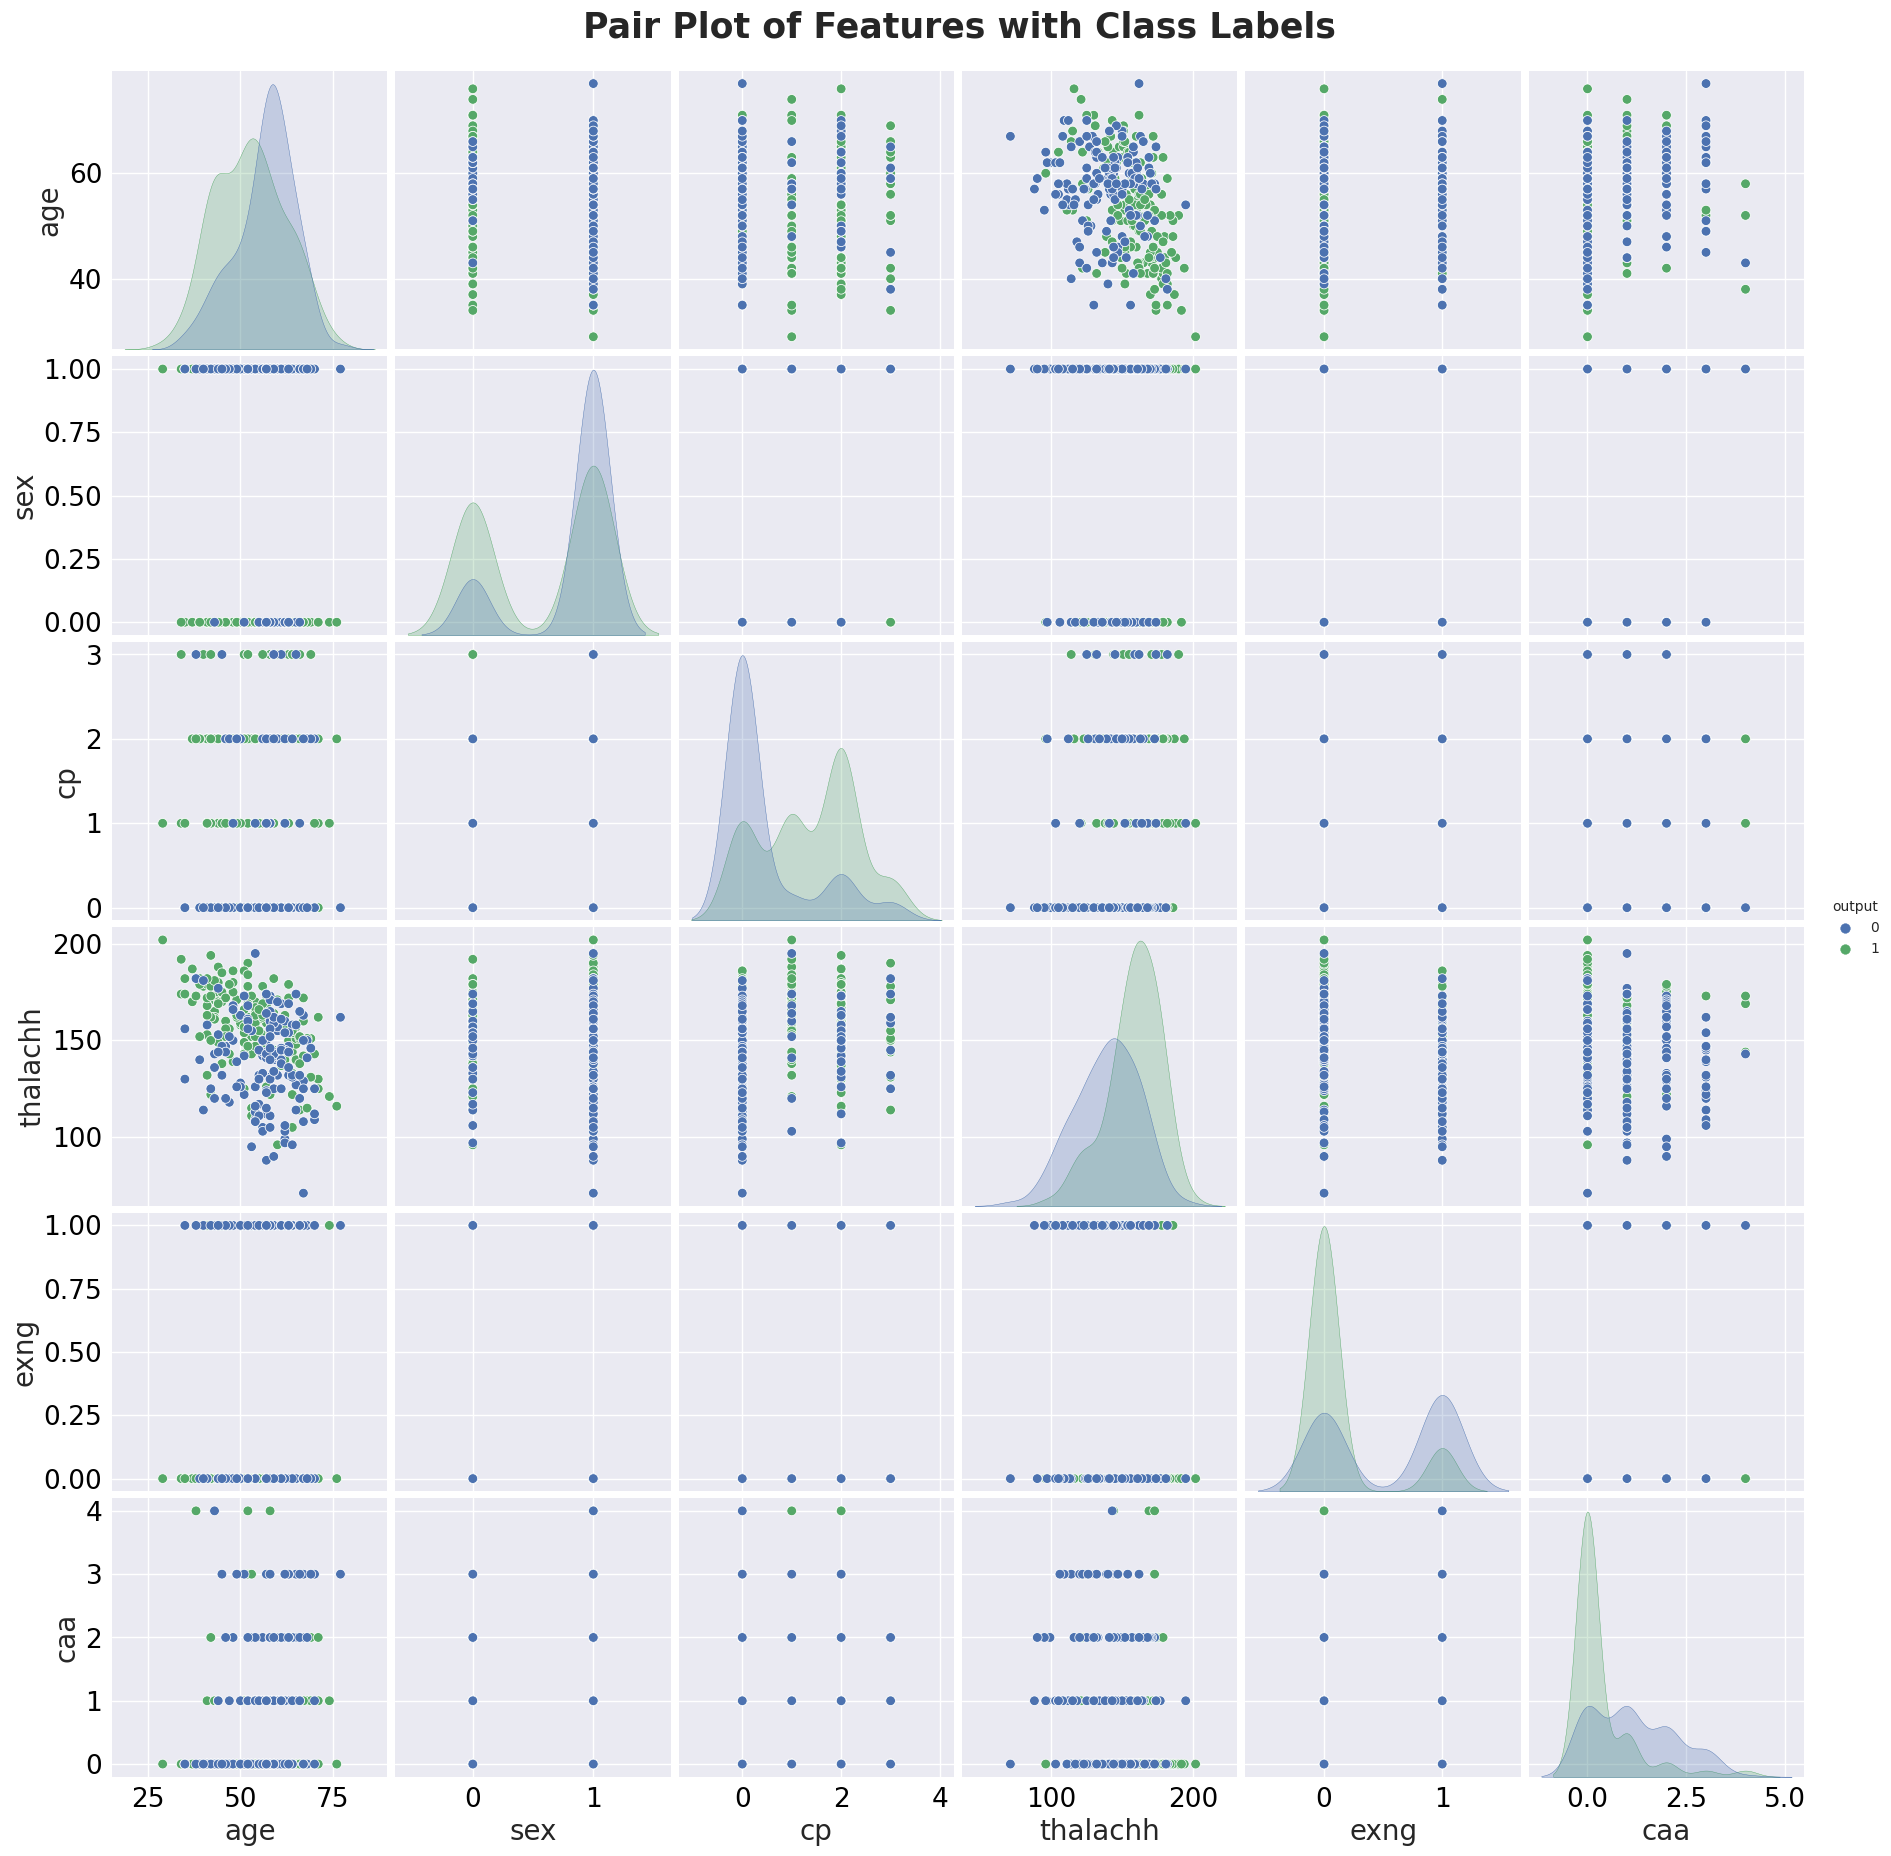

In [6]:
import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

plt.style.use("seaborn")

# Create pairplot
pairplot_1 = sns.pairplot(df1, hue='output', height=3, aspect=1)

# Add grids
for ax in pairplot_1.axes.flatten():
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=19, labelcolor='black', width=1.5)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)

# Add title
plt.suptitle('Pair Plot of Features with Class Labels', fontsize=25, fontweight='bold', y=1.02)

# Show plot

Looking at the pair plots above, most of the data is clustered. The only notable visual exception is cholesterol, with a single outlier point across all graphs with chol > 500

Hence, to reduce noise, we drop data with chol > 500

^ This was based on a previous analysis; no longer relevant with chol dropped.


In [7]:
#index = df1.loc[df1['chol'] > 500].index
#df1.drop(index=index, inplace=True)
#df1

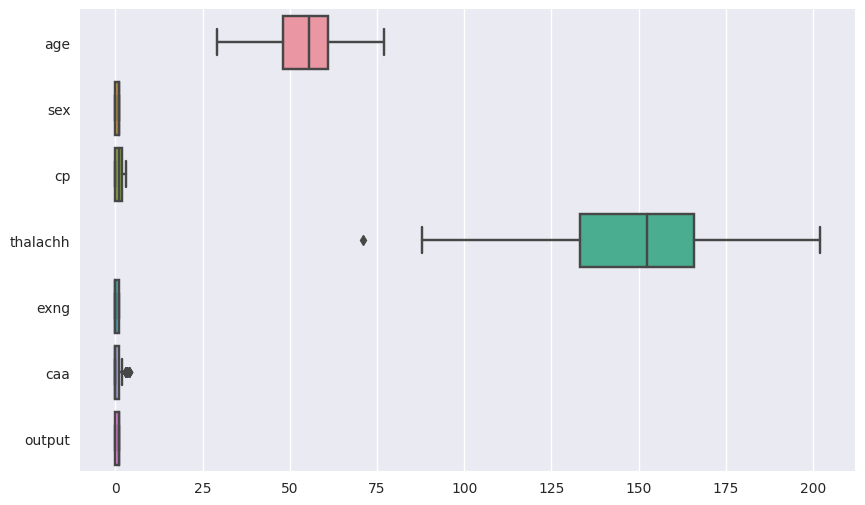

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, orient="h");


Here, we generate a correlation heatmap to see which variables correlate with heart attack prediction, and also identify any potential collinearity in input parameters

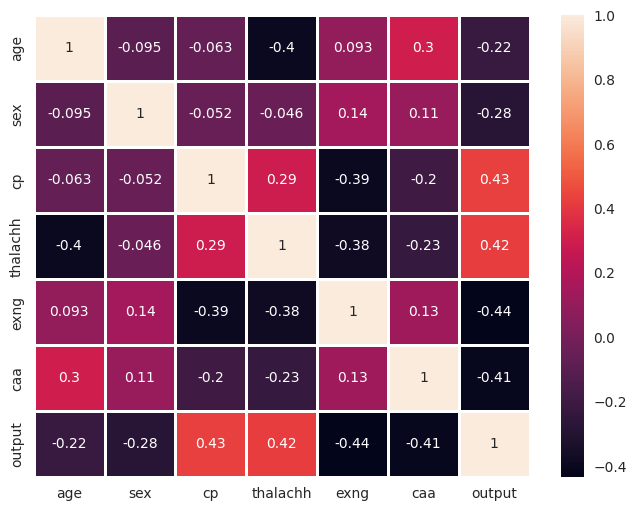

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, linewidths=0.75);

We note positive correlation between the presence of heart disease (output) and cp, restecg, and thalachh, and a negative correlation between the presence of heart disease (output) and age, sex, trbps, chol, exng, and caa. Only fbs appears to have little correlation with output. Additionally, there is considerable multicollinearity in the input parameters, with only a few examples of a correlation close to 0.

^Previous analysis

In [10]:
labels_1 = df1["output"]
df1.pop("output")

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [11]:
scores_list = []
figures = []

import random
for j in range(50):
    random.seed(random.randrange(1, 1000000))
    scores = {}
    
    for i in tqdm([RandomForestClassifier, KNeighborsClassifier, GradientBoostingClassifier, LogisticRegressionCV, LinearSVC]):
        X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df1, labels_1, test_size = 0.15)
        # scale the data with Z score normalization
        scale = StandardScaler()
        scale.fit(X_train_1)
        X_train_1 = scale.fit_transform(X_train_1)
        X_test_1 = scale.transform(X_test_1)
        
        if i == LogisticRegressionCV:
            model = i(penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga', max_iter=1000)
            # max_iter has to be increased just for the model to converge
        else: 
            model = i()
        model.fit(X_train_1, y_train_1)
        #if i == RandomForestClassifier or i == GradientBoostingClassifier:
        #    plt.bar(df1.columns, model.feature_importances_)
        #    plt.xlabel('Features')
        #    plt.ylabel('Importance')
        #    plt.show
        #    figures.append(plt.figure())
        y_pred_1 = model.predict(X_test_1)
        true_score = labels_1.loc[y_test_1.index]
        
        roc_auc = roc_auc_score(true_score, y_pred_1)
        
        scores[i.__name__] = roc_auc
    scores_list.append(scores)

100%|██████████| 5/5 [00:00<00:00,  8.55it/s]


In [12]:
averages = {}
for i in [RandomForestClassifier, KNeighborsClassifier, GradientBoostingClassifier, LogisticRegressionCV, LinearSVC]:
    sum = 0
    for scores in scores_list:
        sum += scores[i.__name__]
    average = sum / len(scores_list)
    averages[i.__name__] = average
for feature in df1.columns:
    print(feature)

averages
    
    
        

age
sex
cp
thalachh
exng
caa


{'RandomForestClassifier': 0.7886684452203017,
 'KNeighborsClassifier': 0.7812615679997866,
 'GradientBoostingClassifier': 0.7869235020388199,
 'LogisticRegressionCV': 0.7944745484599133,
 'LinearSVC': 0.7800208901140461}